# Word2Vec: Continuous Bag-of-Words Model
---

### Loading essential packages

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import nltk

from gensim.models import Word2Vec, KeyedVectors
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from matplotlib import pyplot

### Reading the file

In [2]:
file = pd.read_csv('train.txt')

### Tokenizing the words

In [3]:
# required package for tokenisation
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/swaraj/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [4]:
tokens = [nltk.word_tokenize(i) for i in file]

### Making the Model

In [12]:
model_cbow = Word2Vec(tokens, min_count = 1)

### PCA Visulisation plot for complete embedding

<ipython-input-6-b00dc646006a>:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  X = model_cbow[model_cbow.wv.vocab]


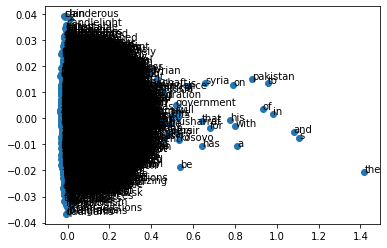

In [6]:
# fit a 2d PCA model to the vectors
X = model_cbow[model_cbow.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)

# create a scatter plot of the projection
pyplot.scatter(result[:, 0], result[:, 1])
words = list(model_cbow.wv.vocab)
for i, word in enumerate(words):
	pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()

### t-SNE Visulisation plot for complete embedding

<ipython-input-9-e219c5ea4205>:5: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  X = model[model.wv.vocab]


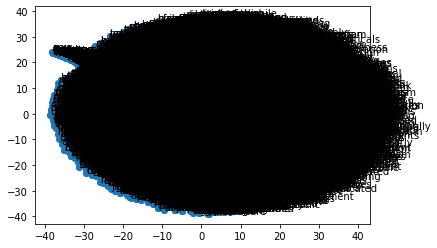

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

def tsneGraph(model):
  X = model[model.wv.vocab]
  tsne = TSNE(n_components=2)
  result = tsne.fit_transform(X)

  # create a scatter plot of the projection
  plt.scatter(result[:, 0], result[:, 1])
  words = list(model.wv.vocab)
  for i, word in enumerate(words):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]))
  plt.show()

tsneGraph(model_cbow)

### Example word: 'wonderful'

In [17]:
model_cbow.most_similar('wonderful')

<ipython-input-17-836337bfe194>:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  model_cbow.most_similar('wonderful')


[('affliction', 0.39531373977661133),
 ('crumble', 0.38827234506607056),
 ('immeasurable', 0.38247859477996826),
 ('unidentified', 0.38197270035743713),
 ('snuck', 0.37196311354637146),
 ('resuscitating', 0.36668339371681213),
 ('inter', 0.3616739809513092),
 ('novelties', 0.3562968671321869),
 ('extraneous', 0.3539901673793793),
 ('peaceable', 0.3536558151245117)]

<ipython-input-16-7e600486667b>:5: DeprecationWarning: Call to deprecated `similar_by_word` (Method will be removed in 4.0.0, use self.wv.similar_by_word() instead).
  close_words = model.similar_by_word(word)
<ipython-input-16-7e600486667b>:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  arr = np.append(arr, np.array([model[word]]), axis=0)


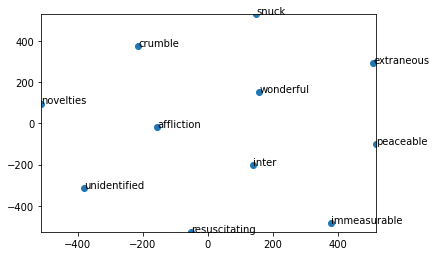

In [16]:
def display_closestwords_tsnescatterplot(model, word, size):
  arr = np.empty((0,size), dtype='f')
  word_labels = [word]

  close_words = model.similar_by_word(word)
  arr = np.append(arr, np.array([model[word]]), axis=0)
  for wrd_score in close_words:
    wrd_vector = model.wv.__getitem__([wrd_score[0]])
    word_labels.append(wrd_score[0])
    arr = np.append(arr, wrd_vector, axis=0)

  tsne = TSNE(n_components = 2, random_state=0)
  np.set_printoptions(suppress=True)
  Y = tsne.fit_transform(arr)

  x_coords = Y[:, 0]
  y_coords = Y[:, 1]
  plt.scatter(x_coords, y_coords)

  for label, x, y in zip(word_labels, x_coords, y_coords):
    plt.annotate(label, xy=(x,y), xytext=(0,0), textcoords='offset points')

  plt.xlim(x_coords.min()+0.00005,x_coords.max()+0.00005 )
  plt.ylim(y_coords.min()+0.00005,y_coords.max()+0.00005 )
  plt.show()

display_closestwords_tsnescatterplot(model_cbow, 'wonderful', 100)

### Saving the model

In [ ]:
# model_cbow.save('model_cbow.dat')